In [2]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_forDet import *
from PossibleFunctionsDet import *
from BackgroundDet import *
from random import uniform
import random
import matplotlib
#%matplotlib auto

In [3]:
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(7.9375,sourcepointorigin,sourcethet,1000) #LOCAL
Rays = FSRay(1000,sourcepoints, sourcethet,origin10)

#CPA=circlepoints([-160.375,-113,-80.0],.35) #circularpointarrangement
Paths = [TTTTio,RRRRio,TTRRio,RTTRio,RTRTio,TRRTio,RRTTio,TRTRio]
vI=[] # original source points
v7 = [] #intersection with E7
vF = []
Rayf = []
for i in range(len(Rays)):
    Ri = Rays[i]
    vI.append(Ri[2])
    for j in range(8):
        out = Paths[j](Ri,p1,p2,p3,p4)
        if out is not None:
            v7.append(out[2])
            det = PLINTzS(80.,out[2],out[3])
            vF.append(det)
            Rayf.append(out)
print('Continue')

Continue


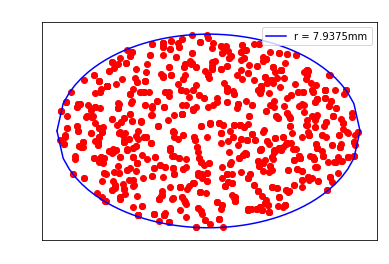

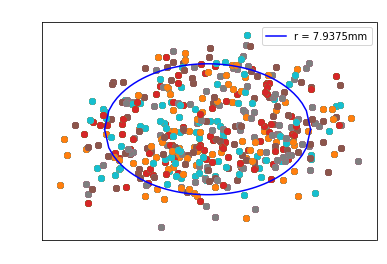

In [4]:
for i in range(len(vI)):
    pl.scatter(vI[i][0],vI[i][1],color = 'red')#,vI[i][2], color = 'red')
pl.title('source', color = 'white')
pl.tick_params(colors='white')
x,yp,yn = circle([-160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label ='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
pl.legend()
pl.show()
for i in range(len(vF)):
    pl.scatter(vF[i][0],vF[i][1])#,color = 'black')#,vI[i][2], color = 'red')
pl.title('detector', color = 'white')
pl.tick_params(colors='white')
x,yp,yn = circle([160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label ='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
pl.legend()
pl.show()

In [5]:
def fillcircle(r,center,num):
    ppr = int((4/np.pi)*np.sqrt(num)) #number of sections needed per quarter circle#points (sections) per radius
    xstart = (center[0] - r)
    xend = (center[0] + r)
    xs = np.linspace(xstart,xend,ppr)
    ystart = (center[1]-r)
    yend = (center[1]+r)
    ys = np.linspace(ystart,yend,ppr)
    points = []
    for i in range(len(xs)):
        for j in range (len(ys)):
            if (xs[i]-center[0])**2 + (ys[j]-center[1])**2 < r**2:
                p = [xs[i],ys[j]]
                points.append(p)
    return points

def checkoutrays(Rays,center,r):
    GRays = []
    BRays = []
    for i in range(len(Rays)):
        det = PLINTzS(80.,Rays[i][2],Rays[i][3])
        Rays[i][2] = det
        d = ((det[0]-center[0])**2) + ((det[1]-center[1])**2)
        if d <= r**2: 
            GRays.append(Rays[i])
        else:
            BRays.append(Rays[i])
    return GRays,BRays

def weight(GRay,mu,sig): #only have it interfere with itself, start with initial ray and check area around it
    point = Gray[2]
    
    

In [6]:
jpoints = fillcircle(7.9375,[160.375,-113],200)
len(jpoints)

216

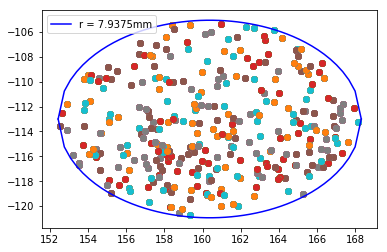

In [7]:
G,B = checkoutrays(Rayf,[160.375,-113],7.9375)
for i in range(len(G)):
    pl.scatter(G[i][2][0],G[i][2][1])
x,yp,yn = circle([160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label ='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
pl.legend()
pl.show()

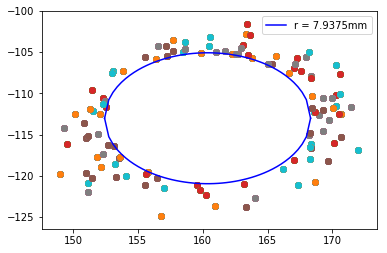

In [8]:
for i in range(len(B)):
    pl.scatter(B[i][2][0],B[i][2][1])
x,yp,yn = circle([160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label ='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
pl.legend()
pl.show()

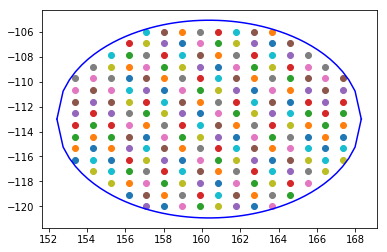

In [9]:
#set up a grid?? #YEAH SET UP GRID USING ONLY GRays
jpoints = fillcircle(7.9375,[160.375,-113],200)
for i in range(len(jpoints)):
    pl.scatter(jpoints[i][0],jpoints[i][1])
x,yp,yn = circle([160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label ='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
pl.show()

In [10]:
def gridlines(r,center,num):
    ppr = int((4/np.pi)*np.sqrt(num)) #number of sections needed per quarter circle#points (sections) per radius
    xstart = (center[0] - r)
    xend = (center[0] + r)
    xs = np.linspace(xstart,xend,ppr)
    ystart = (center[1]-r)
    yend = (center[1]+r)
    ys = np.linspace(ystart,yend,ppr)
    return xs,ys


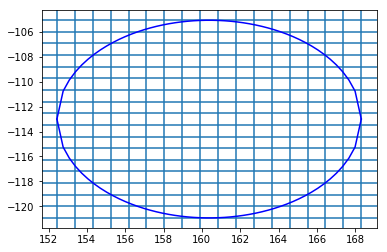

In [118]:
jx,jy = gridlines(7.9375,[160.375,-113],200)
for i in range(len(jx)):
    pl.axvline(float(jx[i]))
for j in range(len(jy)):
    pl.axhline(jy[j])
x,yp,yn = circle([160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label ='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
pl.show()


In [11]:
#CPA=circlepoints([-160.375,-113,-80.0],.35) #circularpointarrangement
def OFD(Rays): #output from detector
    Rayf = []
    for i in range(len(Rays)):
        Paths = [TTTTio,RRRRio,TTRRio,RTTRio,RTRTio,TRRTio,RRTTio,TRTRio]
        Ri = Rays[i]
        for j in range(8):
            out = Paths[j](Ri,p1,p2,p3,p4)
            if out is not None:
                Rayf.append(out)
    return Rayf
def sortgrid(Gtest): #assuming detector but can change
    for i in range(len(Gtest)):
        jx,jy = gridlines(7.9375,[160.375,-113],200)
        if len(Gtest[i])<7:
            Gtest[i].append(0.)
            Gtest[i].append(0.)
        for j in range(len(jx)):
            if Gtest[i][2][0] >= jx[j-1] and Gtest[i][2][0]<jx[j]:
                Gtest[i][5]=j
            if Gtest[i][2][0] <= jx[1]:
                Gtest[i][5]=1
            if Gtest[i][2][0]> jx[len(jx)-1]:
                Gtest[i][5]=len(jx)
        for k in range(len(jy)):
            if Gtest[i][2][1] >= jy[k-1] and Gtest[i][2][1]>=jy[k]:
                Gtest[i][6]=k
            if Gtest[i][2][1] <= jy[1]:
                Gtest[i][6]=1
            if Gtest[i][2][1]> jy[len(jy)-1]:
                Gtest[i][6]=len(jy)
    return Gtest
    
            
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(7.9375,sourcepointorigin,sourcethet,1000) #LOCAL
Rays = FSRay(1000,sourcepoints, sourcethet,origin10)

#CPA=circlepoints([-160.375,-113,-80.0],.35) #circularpointarrangement
Paths = [TTTTio,RRRRio,TTRRio,RTTRio,RTRTio,TRRTio,RRTTio,TRTRio]
vI=[] # original source points
v7 = [] #intersection with E7
vF = []
Rayf = []
for i in range(len(Rays)):
    Ri = Rays[i]
    vI.append(Ri[2])
    for j in range(8):
        out = Paths[j](Ri,p1,p2,p3,p4)
        if out is not None:
            v7.append(out[2])
            det = PLINTzS(80.,out[2],out[3])
            vF.append(det)
            Rayf.append(out)

print('continue')

continue


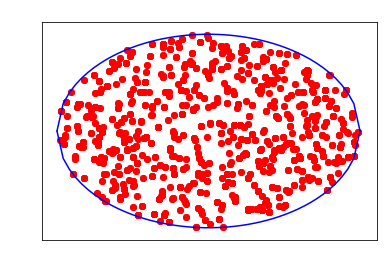

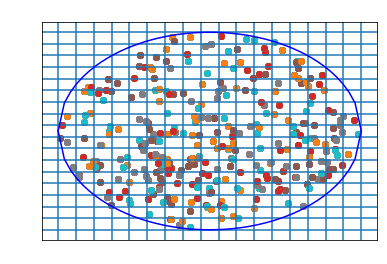

In [18]:
for i in range(len(vI)):
    pl.scatter(vI[i][0],vI[i][1],color = 'red')#,vI[i][2], color = 'red')
pl.title('source', color = 'white')
pl.tick_params(colors='white')
x,yp,yn = circle([-160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
pl.show()

for i in range(len(Gtest)):
    pl.scatter(Gtest[i][2][0],Gtest[i][2][1])
jx,jy = gridlines(7.9375,[160.375,-113],200)
for i in range(len(jx)):
    pl.axvline(float(jx[i]))
for j in range(len(jy)):
    pl.axhline(jy[j])
x,yp,yn = circle([160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label ='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
pl.title('detector', color = 'white')
pl.tick_params(colors='white')
pl.show()

In [19]:
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(7.9375,sourcepointorigin,sourcethet,1000) #LOCAL
Rays = FSRay(200,sourcepoints, sourcethet,origin10)
Rayf = OFD(Rays)
G,B = checkoutrays(Rayf,[160.375,-113],7.9375)
Gtest = list(G)
print('continue')

continue


In [30]:
jx,jy = gridlines(7.9375,[160.375,-113],200)
Gtestsorted = sortgrid(Gtest)
def regionalize(Gtestsorted):
    FullRegions = []
    jx,jy = gridlines(7.9375,[160.375,-113],200)
    for j in range(len(jx)):
        for k in range(len(jy)):
            JK = [j,k]
            for i in range(len(Gtestsorted)):
                if Gtestsorted[i][5]==j and Gtestsorted[i][6]==k:
                    JK.append(i)
            if len(JK)>2:
                FullRegions.append(JK)
    return FullRegions

In [66]:
def RunAll(n): #just give number of rays to be run through this FTS
    sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
    sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
    sourcepoints = specsource(7.9375,sourcepointorigin,sourcethet,1000) #LOCAL
    Rays = FSRay(n,sourcepoints, sourcethet,origin10)
    Rayf = OFD(Rays)
    G,B = checkoutrays(Rayf,[160.375,-113],7.9375)
    Gtestsorted = sortgrid(G)
    Regions = regionalize(Gtestsorted)
    return Gtestsorted,Regions

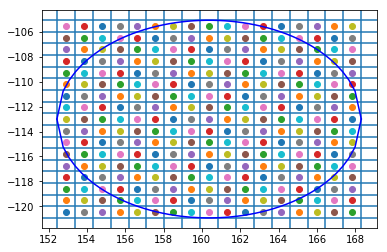

In [68]:
jx,jy = gridlines(7.9375,[160.375,-113],200)
for i in range(len(jx)):
    pl.axvline(float(jx[i]))
for j in range(len(jy)):
    pl.axhline(jy[j])
x,yp,yn = circle([160.375,-113],7.9375)
pl.plot(x,yp, color = 'blue',label ='r = 7.9375mm')
pl.plot(x,yn, color = 'blue')
for j in range(len(jx)-1):
    for k in range(len(jy)-1):
        pl.scatter((jx[j]+jx[j+1])/2,(jy[k]+jy[k+1])/2) 
pl.show()
#FUCK IT WORKS, this is the center of each gaussian
#now only choose centers that actually have RAYS in them


In [58]:
def gaussian3d(x,y,sig,mux,muy): #assuming is symmetric
    #sig = .3 #just guessing
    return (1/(np.sqrt(2*np.pi*(sig**2))*(sig**2)))*np.exp(-(((x-mux)**2)/(2*sig**2) + ((y-muy)**2)/(2*sig**2)))

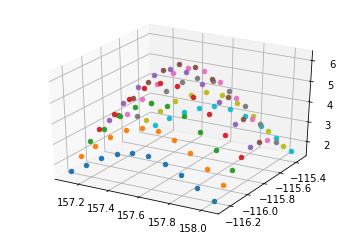

In [63]:
pl3dsurf = pl.figure().gca(projection = '3d')
for x in  np.linspace(jx[5],jx[6],10):
    for y in np.linspace(jy[5],jy[6],10):
        z = gaussian3d(x,y,.4,(jx[5]+jx[6])/2,(jy[5]+jy[6])/2)
        pl3dsurf.scatter(x,y,z)
pl.show()
        


In [75]:
OutRays, regions = (RunAll(100))
Regions = list(regions)

In [86]:
print(Regions[1])
ExTot = [] #total for region 1
EyTot = [] #total for region 1
def jRegions(n):
    OutRays,regions=RunAll(n)
    Regions = list(regions)
    jx,jy = gridlines(7.9375,[160.375,-113],200)
    DetTot = []
    for j in range(len(regions)):
        for i in range(len(Regions[j])): #All rays in region 1
            ExTot = []
            EyTot = []
            if i != 0 and i != 1:
                JRegion = Regions[j]
                #so there are 8 output rays YAY, what is expected
                #now use polarization angle and E_0 to get Z_x and Z_y 
                #CHECK IF I AM TRANSMITTING /REFLECTING E_0 CORRECTLY
                m,n = JRegion[0],JRegion[1]
                Raym = OutRays[JRegion[i]]
                if m != len(jx) and n !=len(jy):
                    w = gaussian3d(Raym[2][0],Raym[2][1],.4,(jx[m]+jx[m+1])/2,(jy[n]+jy[n+1])/2)
                else: 
                    w = 0
                Ex = w*np.abs(np.cos(Raym[0])*Raym[1])
                Ey = w*np.abs(np.sin(Raym[0])*Raym[1])
                ExTot.append(Ex)
                EyTot.append(Ey)
        Ij = (np.sum(ExTot))**2 + (np.sum(EyTot))**2
        DetTot.append(Ij)
    return DetTot

[3, 6, 72, 73, 74, 75, 76, 77, 78, 79]


In [87]:
print (jRegions(100))
#now do for different positions of mirror and SUM UP
#change all the TTTTio things to take y position of mirror as a variable


[0.0015809698043440308, 9.939767349951653e-05, 0.00025864697958530314, 0.031239051636051254, 0.10587820915963793, 0.00014453166682207053, 0.0015379613996840621, 0.2665925280581391, 0.0096095988263134903, 0.07095898230444006, 0.008701794137484729, 0.0035562174199644881, 7.5330283549011336e-05, 0.002160968167570069, 0.00036237962754001558, 2.5517867611201064, 0.42593920380027267, 0.060596977650967221, 0.00070443642897609934, 2.5523494681501591, 1.5076987977286318, 0.00011939469640928616, 0.011562635265336987, 0.31322118939168631, 0.061777386024332311, 1.4147783982704225, 0.00022699019470490356]
